In [5]:
import numpy as np
import pandas as pd

for fun

In [6]:
class KNN_classifier:
    def __init__(self, n_neighbors: int, **kwargs):
        self.K = n_neighbors
        self.points = []

    def euc_distance(self, point_1, point_2, dim):
        result = 0
        for i in range(dim):
            result += (point_1[i] - point_2[i])**2
        return np.sqrt(result)

    def fit(self, x: np.array, y: np.array):
        dim = np.array(x).shape[1]
        np.array(x).reshape(-1, 1)
        points = np.concatenate((np.array(x), np.array(y).reshape(-1, 1)), axis=1)
        self.points = points
        pass

    def predict(self, x: np.array):
        predictions = []
        dim = np.array(x).shape[1]

        for point in x:
            keyfunc = lambda another_point: self.euc_distance(point, another_point, dim)
            sorted_points = sorted(self.points, key=keyfunc)
            C0 = 0
            C1 = 0
            for p in sorted_points[:self.K]:
                assert p[dim] == 1 or p[dim] == 0
                if p[dim] == 0:
                    C0 += 1
                else:
                    C1 += 1
            result = 0 if C0 > C1 else 1
            predictions.append(result)

        predictions = np.array(predictions)
        return predictions

# Homework

In [7]:
all_data = pd.read_csv('datasets/forest_dataset.csv')

labels = all_data[all_data.columns[-1]].values
feature_matrix = all_data[all_data.columns[:-1]].values

The quality of classification/regression by the k Nearest Neighbors method depends on several parameters:
* the number of neighbors `n_neighbors`
* the distance metric between objects `metric`
* the weights of neighbors (the neighbors of the test example can enter with different weights, for example, the further the example, the less its "voice" is taken into account) `weights`


Train the `KNeighborsClassifier` on the dataset.

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

clf = KNeighborsClassifier(n_neighbors=1, weights=None, metric="euclidean")
train_feature_matrix, test_feature_matrix, train_labels, test_labels = train_test_split(
    feature_matrix, labels, test_size=0.2, random_state=42)
clf.fit(train_feature_matrix, train_labels)
y_pred = clf.predict(test_feature_matrix)
accuracy_score(test_labels, y_pred)

0.783

Let's select the parameters of our model:

* Iterate over the grid from `1` to `10` for the number of neighbors parameter
* Also, try using different metrics: `['manhattan', 'euclidean']`
* Try using different weight calculation strategies: `[‘uniform’, ‘distance’]`

In [11]:
from sklearn.model_selection import GridSearchCV
params = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'metric': ['euclidean', 'manhattan', 'cosine', 'haversine', 'l1', 'l2'],
    'weights': ['uniform', 'distance']
}

clf_grid = GridSearchCV(clf, params, cv=5, scoring='accuracy', n_jobs=-1)
clf_grid.fit(feature_matrix, labels)

/Users/damirhabibulin/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/damirhabibulin/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/Users/damirhabibulin/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/Users/damirhabibulin/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_scorer.py", line 380, in _score
    y_pred = method_caller(
  File "/Users/damirhabibulin/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
  File "/Us

GridSearchCV(cv=5,
             estimator=KNeighborsClassifier(metric='euclidean', n_neighbors=1,
                                            weights=None),
             n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'cosine',
                                    'haversine', 'l1', 'l2'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

Let's output the best parameters

In [12]:
clf_grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'distance'}

Using the optimal number of neighbors found, calculate the probabilities of belonging to classes for the test sample (`.predict_proba`).

In [16]:
optimal_clf = KNeighborsClassifier(n_neighbors=4, weights='distance', metric='manhattan')
optimal_clf.fit(train_feature_matrix, train_labels)
pred_prob = optimal_clf.predict_proba(test_feature_matrix)
print(pred_prob)

[[0.         1.         0.         ... 0.         0.         0.        ]
 [0.73117861 0.26882139 0.         ... 0.         0.         0.        ]
 [0.27814042 0.72185958 0.         ... 0.         0.         0.        ]
 ...
 [1.         0.         0.         ... 0.         0.         0.        ]
 [0.         1.         0.         ... 0.         0.         0.        ]
 [0.54264548 0.         0.         ... 0.         0.         0.45735452]]


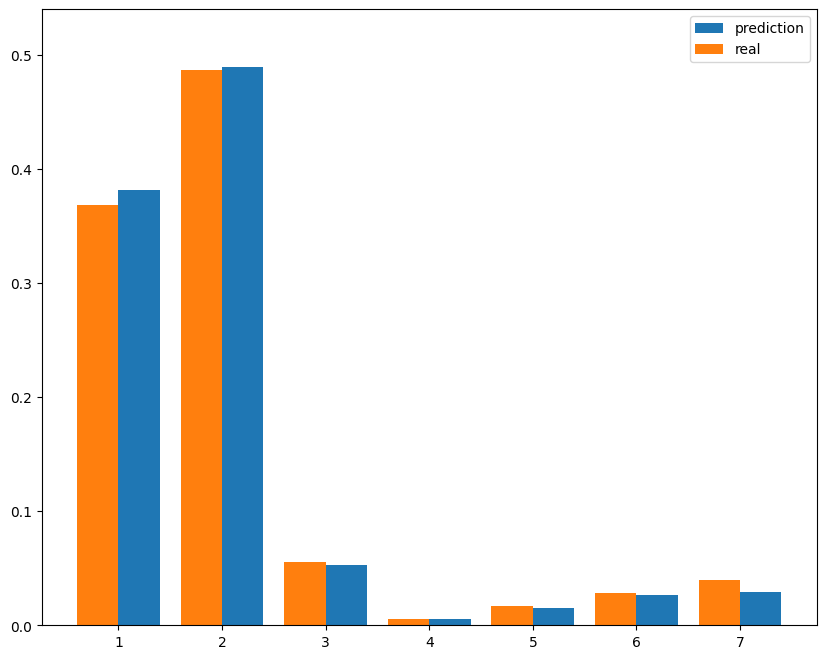

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

unique, freq = np.unique(test_labels, return_counts=True)
freq = list(map(lambda x: x / len(test_labels),freq))

pred_freq = pred_prob.mean(axis=0)
plt.figure(figsize=(10, 8))
plt.bar(range(1, 8), pred_freq, width=0.4, align="edge", label='prediction')
plt.bar(range(1, 8), freq, width=-0.4, align="edge", label='real')
plt.ylim(0, 0.54)
plt.legend()
plt.show()

## Conclusion

What is the quality of the model on the test sample? Compare it with the quality of logistic regression. Which model is better? Why? What are the pros and cons of the k Nearest Neighbors method? Plot the ROC curve for the k Nearest Neighbors method. Calculate the area under the ROC curve (AUC-ROC).

What is the quality of the model on the test sample?

In [19]:
optimal_y_pred = optimal_clf.predict(test_feature_matrix)
knn_accuracy = accuracy_score(test_labels, optimal_y_pred)
print(knn_accuracy)

0.785


Compare it with the quality of logistic regression.

In [20]:
from sklearn.linear_model import LogisticRegression

clf_log = LogisticRegression(C=1, solver='lbfgs')
clf_log.fit(train_feature_matrix, train_labels)
y_pred_log = clf_log.predict(test_feature_matrix)

log_accuracy = accuracy_score(test_labels, y_pred_log)
print(log_accuracy)

0.6075


/Users/damirhabibulin/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
print(knn_accuracy - log_accuracy)

0.1775


Which model is better? Why?

Obviously, knn is better in our case and we can see with accuracy results, but i think that there a lot of problems, where logistic regression will be more useful. 
it is better because we found the best parametrs for our problem.

What are the pros and cons of the k Nearest Neighbors method?

**pros**
1. **small time of training**: it is because training for knn is remembering all given objects
2. **simple**: everyone can understand the method and use it
3. **accuracy**: it ccan be very accurate if k, metric and other parametrs are correctly fitted

**cons**
1. **long predictions**: it is long because of its training specification
2. **parametrs**: knn accuracy strongly depends on parametrs of the model and sometimes it is hard to find them

Plot the ROC curve for the k Nearest Neighbors method. Calculate the area under the ROC curve (AUC-ROC).

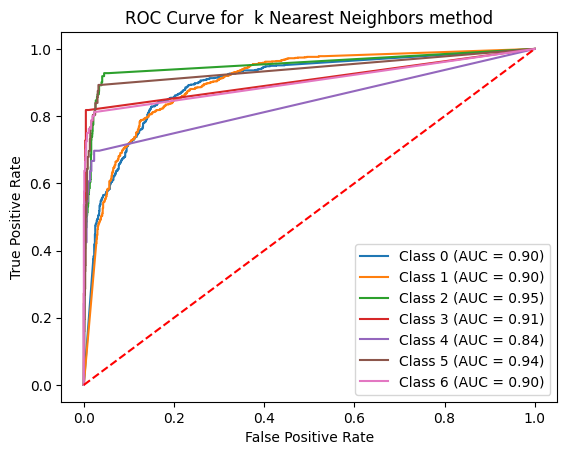

In [26]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

y_true_bin = label_binarize(test_labels, classes=np.arange(1,8))
y_pred_proba = optimal_clf.predict_proba(test_feature_matrix)

plt.figure()
for i in range(7):  # Для каждого из 3 классов
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], np.array(y_pred_proba)[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color="red", linestyle="--")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for  k Nearest Neighbors method')
plt.legend()
plt.show()